# 데이터 탐색 연습
- 전력데이터를 가지고 간단한 분석 실행
- 데이터 시각화 (scatter plot, histogram, heatmap)
- correlation
- outlier detection and removal


### 데이터
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip show xlrd

Name: xlrd
Version: 2.0.1
Summary: Library for developers to extract data from Microsoft Excel (tm) .xls spreadsheet files
Home-page: http://www.python-excel.org/
Author: Chris Withers
Author-email: chris@withers.org
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [ ]:
import xlrd
xlrd.__version__

'2.0.1'

데이터 읽기
--

In [ ]:
!curl -L https://goo.gl/Cx8Rzw -o 시도별_용도별.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   105  100   105    0     0    187      0 --:--:-- --:--:-- --:--:--   187
100   297  100   297    0     0    356      0 --:--:-- --:--:-- --:--:--   356
100   470    0   470    0     0    319      0 --:--:--  0:00:01 --:--:--   997
100 17920  100 17920    0     0  10870      0  0:00:01  0:00:01 --:--:-- 10870


In [ ]:
power_data = pd.read_excel("시도별_용도별.xls")
print(power_data.shape)

(19, 28)


In [ ]:
pd.concat([power_data.head(3), power_data.tail(3)])

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
16,충남,2691823,1089613,7164439,8254052,1928066,248313,37057955,1137035,269998,...,611925,12208,428906,10953811,2526658,33766,53804,19725,39234334,50180209
17,충북,2027281,1267140,4804638,6071778,721131,139856,15883448,1152073,333846,...,366871,23076,1125141,4103832,603349,82496,513501,46038,16744435,24843494
18,합계,64576423,22204112,134748546,156952658,15373994,1347957,252942540,10735833,11247578,...,10504640,487262,5763846,47655808,17790147,4311878,3396006,559909,269664491,491193571


In [ ]:
type(power_data), power_data.columns, power_data.index

(pandas.core.frame.DataFrame,
 Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
        '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
        '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
        '산업용합계', '합계'],
       dtype='object'),
 RangeIndex(start=0, stop=19, step=1))

In [ ]:
power_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      19 non-null     object
 1   주거용     19 non-null     int64 
 2   공공용     19 non-null     int64 
 3   서비스업    19 non-null     int64 
 4   업무용합계   19 non-null     int64 
 5   농림어업    19 non-null     int64 
 6   광업      19 non-null     int64 
 7   제조업     19 non-null     int64 
 8   식료품제조   19 non-null     int64 
 9   섬유,의류   19 non-null     int64 
 10  목재,나무   19 non-null     int64 
 11  펄프,종이   19 non-null     int64 
 12  출판,인쇄   19 non-null     int64 
 13  석유,화확   19 non-null     int64 
 14  의료,광학   19 non-null     int64 
 15  요업      19 non-null     int64 
 16  1차금속    19 non-null     int64 
 17  조립금속    19 non-null     int64 
 18  기타기계    19 non-null     int64 
 19  사무기기    19 non-null     int64 
 20  전기기기    19 non-null     int64 
 21  영상,음향   19 non-null     int64 
 22  자동차     19 non-null     int6

In [ ]:
 power_data.describe()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,...,1.900000e+01,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01
mean,6.899673e+06,2.410981e+06,1.451057e+07,1.692155e+07,1.650270e+06,1.628526e+05,2.694144e+07,1.158857e+06,1.184641e+06,2.016269e+05,...,1.107597e+06,51397.000000,6.087239e+05,5.018716e+06,1.878618e+06,4.595993e+05,3.581517e+05,59117.789474,2.875456e+07,5.257579e+07
std,1.457381e+07,4.957221e+06,3.031208e+07,3.526148e+07,3.464035e+06,3.102484e+05,5.669154e+07,2.399623e+06,2.604338e+06,4.514169e+05,...,2.437518e+06,127516.047494,1.300814e+06,1.190370e+07,3.981244e+06,1.058183e+06,8.481672e+05,126709.246048,6.037040e+07,1.092609e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.906912e+06,6.959615e+05,3.802654e+06,4.524926e+06,7.203850e+04,9.938500e+03,2.759556e+06,1.959545e+05,7.325600e+04,5.590500e+03,...,7.220050e+04,3672.000000,6.083550e+04,4.510550e+04,9.622850e+04,1.154750e+04,1.313200e+04,2739.000000,2.814293e+06,1.240509e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,7.152900e+04,1.236782e+07,5.329430e+05,3.338460e+05,2.799800e+04,...,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,4.058920e+06,1.413990e+06,8.034786e+06,9.476781e+06,1.837764e+06,1.822120e+05,2.366853e+07,1.034889e+06,8.374750e+05,1.033945e+05,...,8.433595e+05,14393.500000,5.898460e+05,2.614198e+06,2.256474e+06,1.775380e+05,1.976150e+05,46850.000000,2.530336e+07,4.005174e+07
max,6.457642e+07,2.220411e+07,1.347485e+08,1.569527e+08,1.537399e+07,1.347957e+06,2.529425e+08,1.073583e+07,1.124758e+07,1.905882e+06,...,1.050464e+07,487262.000000,5.763846e+06,4.765581e+07,1.779015e+07,4.311878e+06,3.396006e+06,559909.000000,2.696645e+08,4.911936e+08


In [ ]:
power = power_data.set_index('구분'); power.head()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
개성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [ ]:
power = power.drop(['합계', '개성'], errors='ignore')

데이터 특성 보기
--
- boxplot
- barplot
- histogram

박스플롯
--

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [ ]:
# Colab 에서 한글 폰트 설정 - 설중 후에 꼭 다시 runtime restart 해 주어야 함
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
# mpl.font_manager._rebuild()
matplotlib.font_manager._load_fontmanager(try_read_cache=False)

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [ ]:
power.describe()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,...,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01
mean,3.912786e+06,1.388502e+06,8.291312e+06,9.679813e+06,9.400665e+05,102720.176471,1.523205e+07,6.636738e+05,6.623886e+05,113237.000000,...,6.199825e+05,28781.235294,3.412887e+05,2.805870e+06,1.053153e+06,2.600299e+05,2.005222e+05,33137.000000,1.627484e+07,2.986743e+07
std,4.310227e+06,1.298531e+06,8.708909e+06,9.981623e+06,1.010972e+06,122502.337918,1.524290e+07,6.333206e+05,9.612365e+05,192034.155445,...,9.142491e+05,75569.163261,3.788489e+05,6.246070e+06,1.031256e+06,5.260199e+05,4.450945e+05,38105.462924,1.598920e+07,2.618055e+07
min,3.849030e+05,2.996750e+05,6.454240e+05,9.450990e+05,1.515000e+04,2898.000000,2.415370e+05,1.102110e+05,3.497000e+03,1324.000000,...,1.167000e+03,0.000000,7.710000e+02,0.000000e+00,7.730000e+02,0.000000e+00,1.743000e+03,743.000000,1.588755e+06,2.918758e+06
25%,1.940933e+06,8.263960e+05,3.955921e+06,4.910602e+06,7.460800e+04,14019.000000,2.910768e+06,2.041710e+05,7.589500e+04,6782.000000,...,7.797000e+04,4395.000000,8.360900e+04,4.622500e+04,1.134480e+05,1.765600e+04,1.339200e+04,2875.000000,2.988274e+06,1.538637e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,71529.000000,1.236782e+07,5.329430e+05,3.338460e+05,27998.000000,...,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,3.856852e+06,1.400421e+06,7.582169e+06,8.888045e+06,1.747462e+06,139856.000000,2.145393e+07,9.327430e+05,7.316510e+05,72680.000000,...,7.825700e+05,14319.000000,4.289060e+05,1.124564e+06,2.156059e+06,1.239350e+05,1.327070e+05,46038.000000,2.462327e+07,3.464786e+07
max,1.658771e+07,5.533662e+06,3.343455e+07,3.896821e+07,3.096126e+06,398287.000000,5.660333e+07,2.544420e+06,3.780171e+06,639429.000000,...,3.613798e+06,317244.000000,1.125141e+06,2.451964e+07,2.977165e+06,2.048646e+06,1.833112e+06,133041.000000,5.929194e+07,1.148479e+08


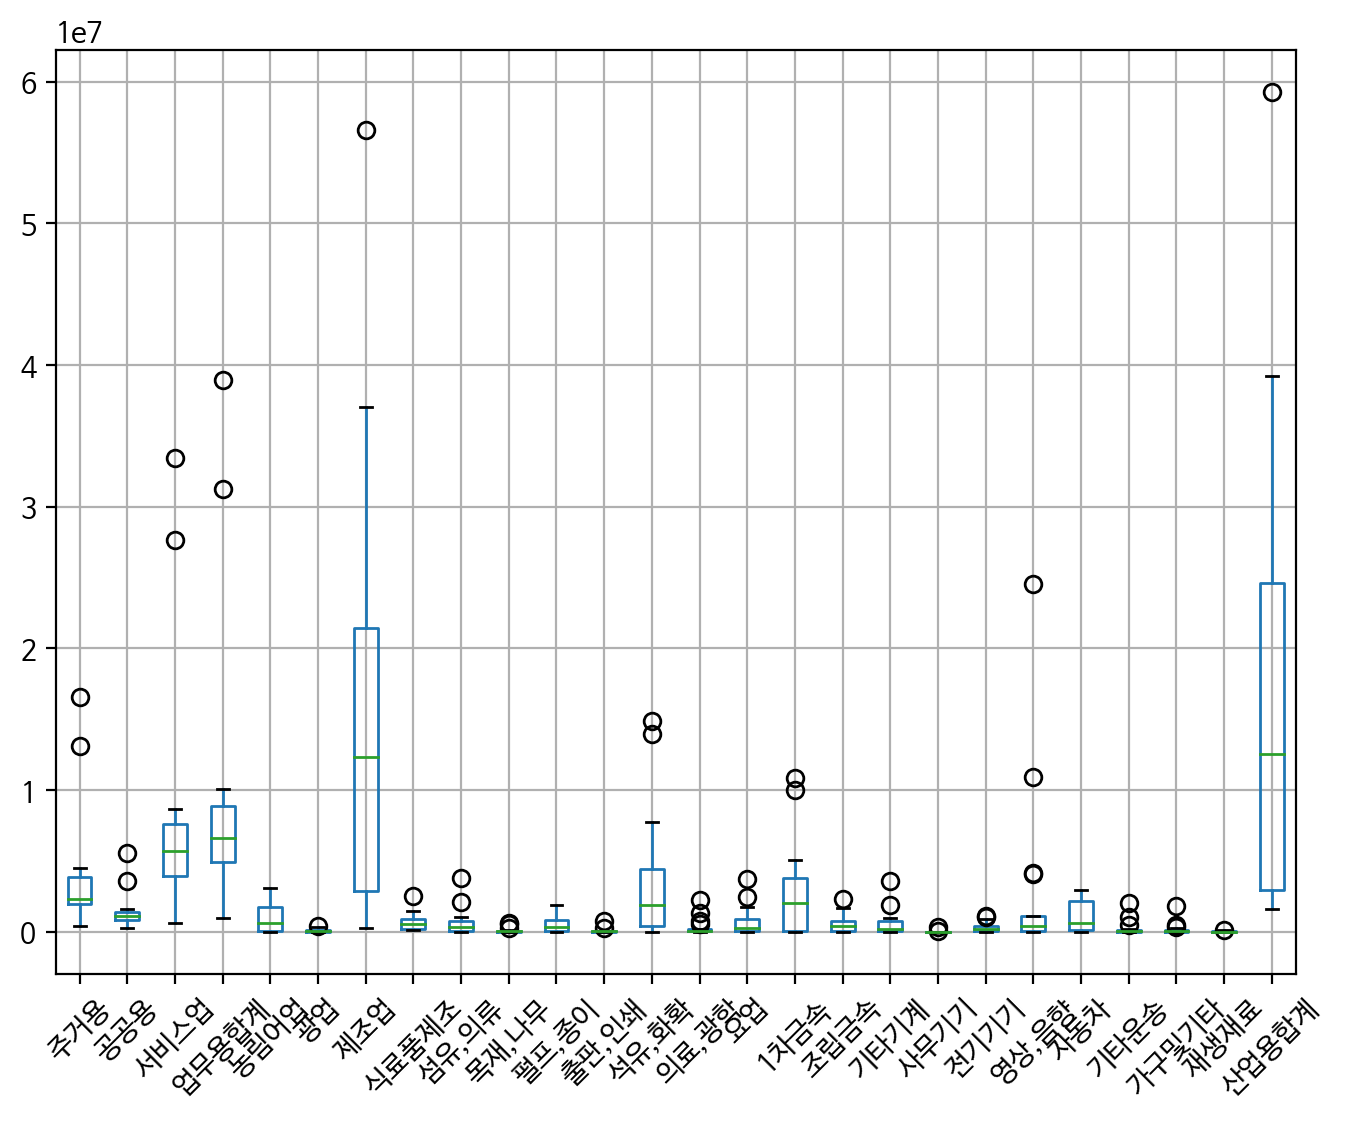

In [ ]:
power.drop('합계', axis=1).boxplot(figsize=(8,6))
plt.xticks(rotation=45)
plt.show()

<Axes: >

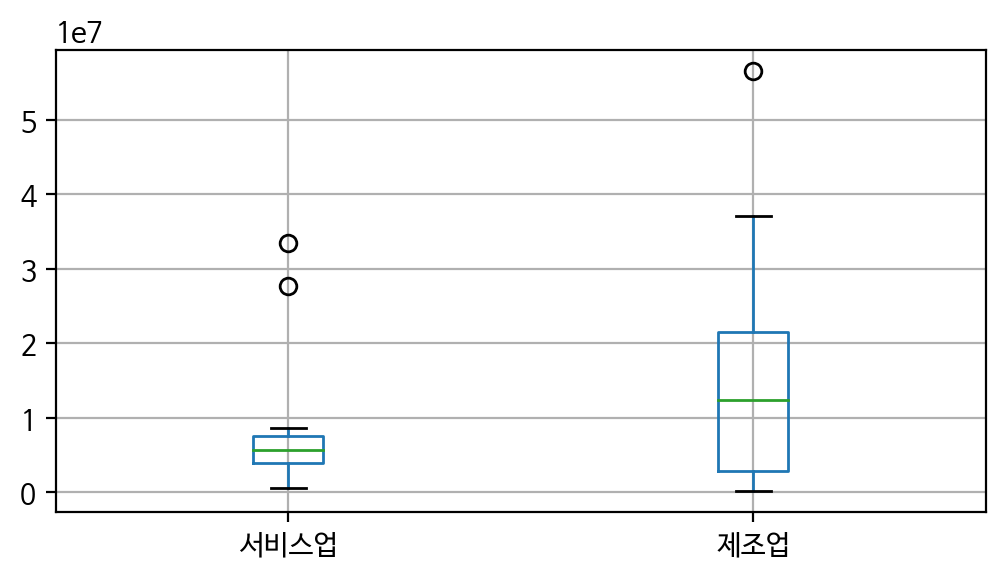

In [ ]:
power[['서비스업','제조업']].boxplot(figsize=(6,3))

바 플롯 (수평형)
--

In [ ]:
power = power.drop('합계', axis=1)

<Axes: ylabel='구분'>

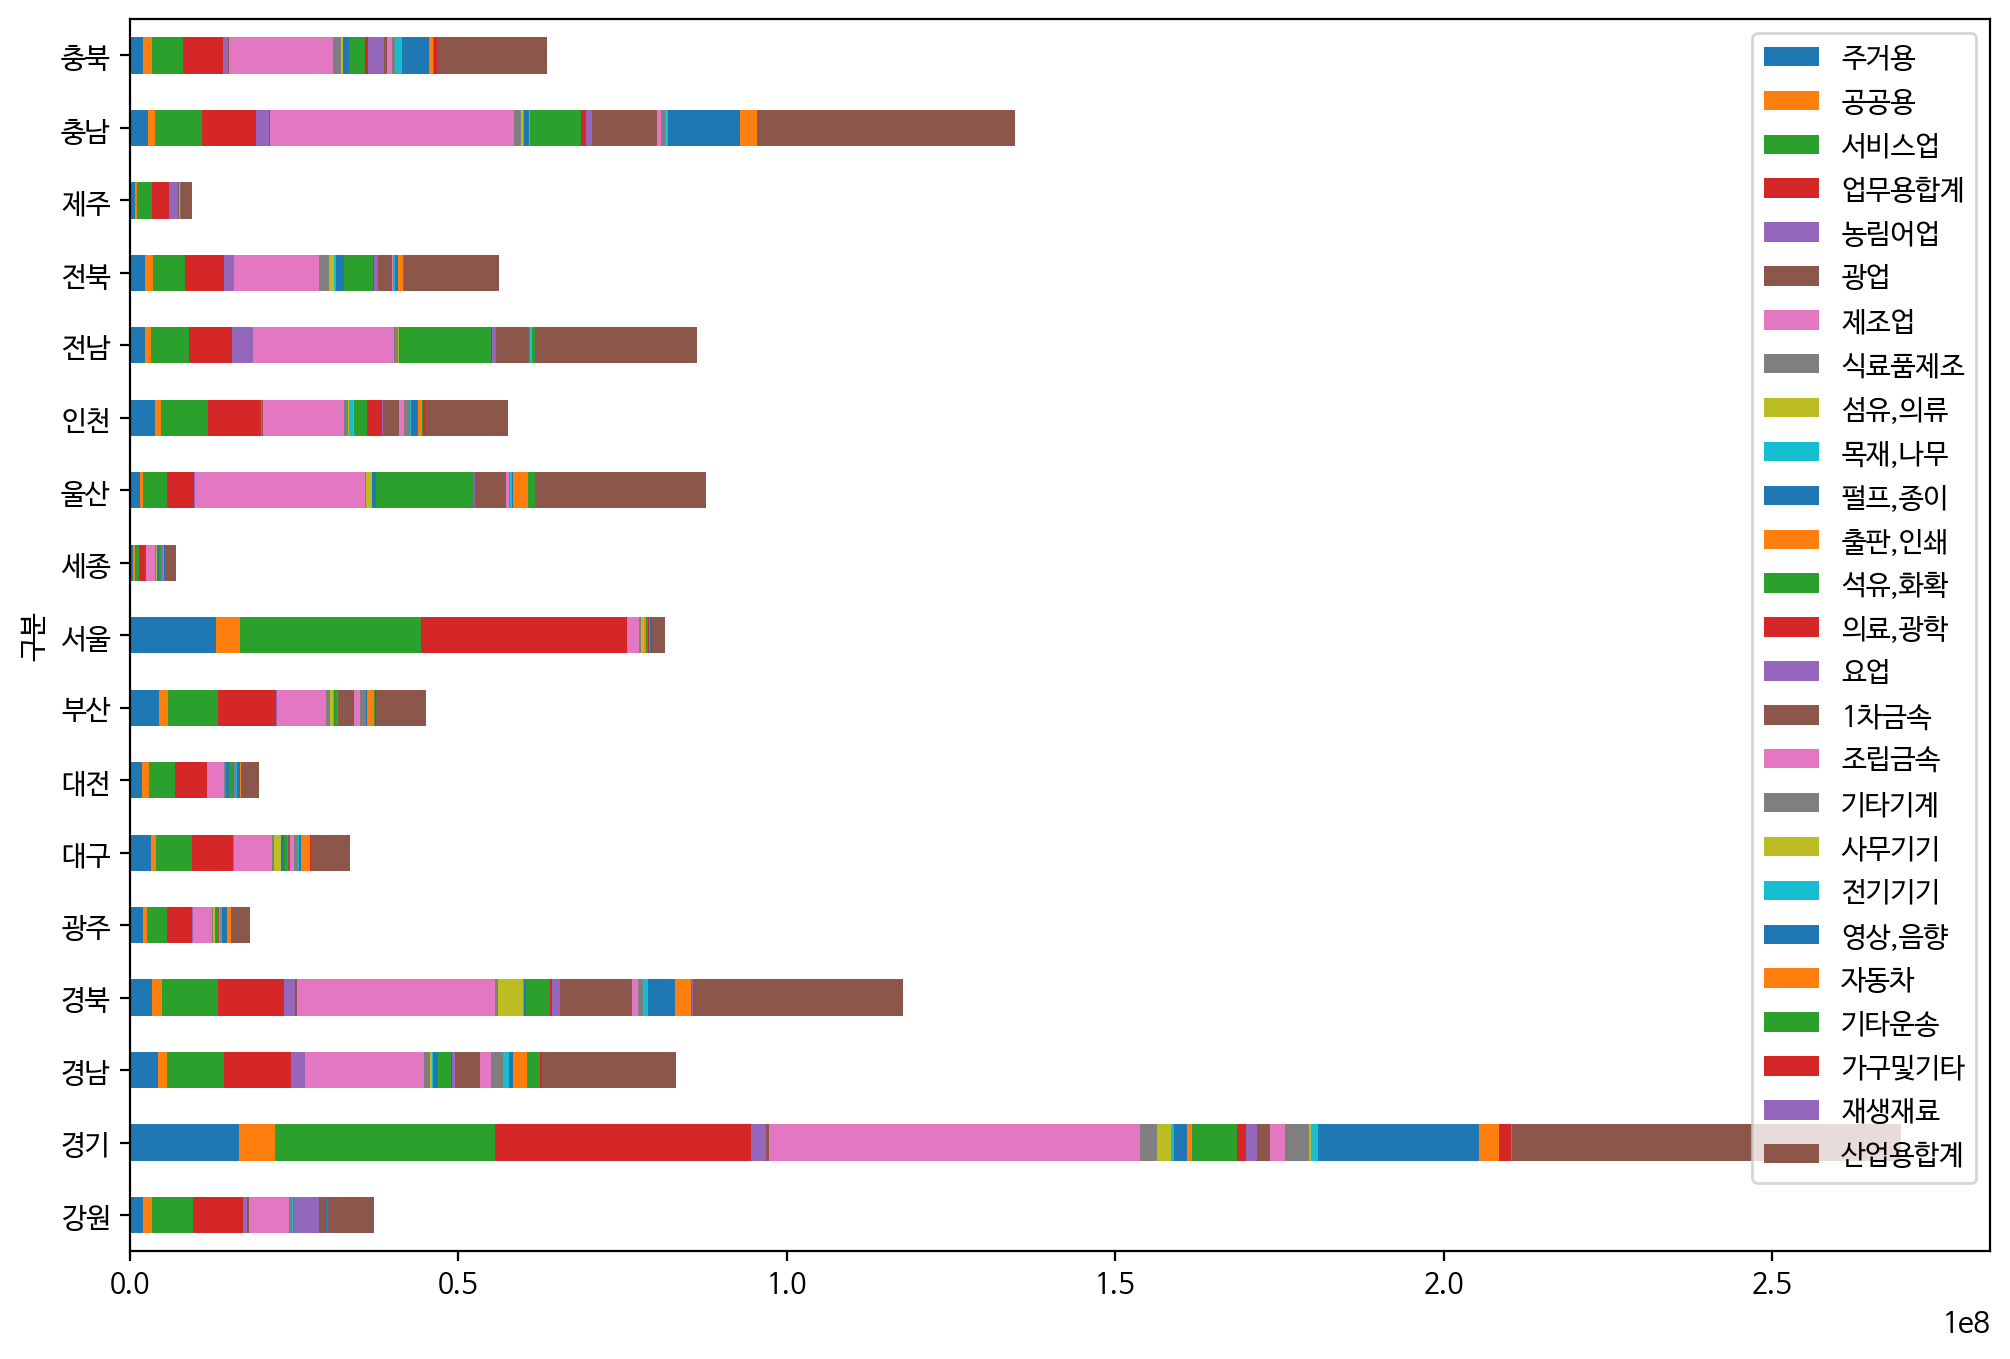

In [ ]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

<Axes: ylabel='구분'>

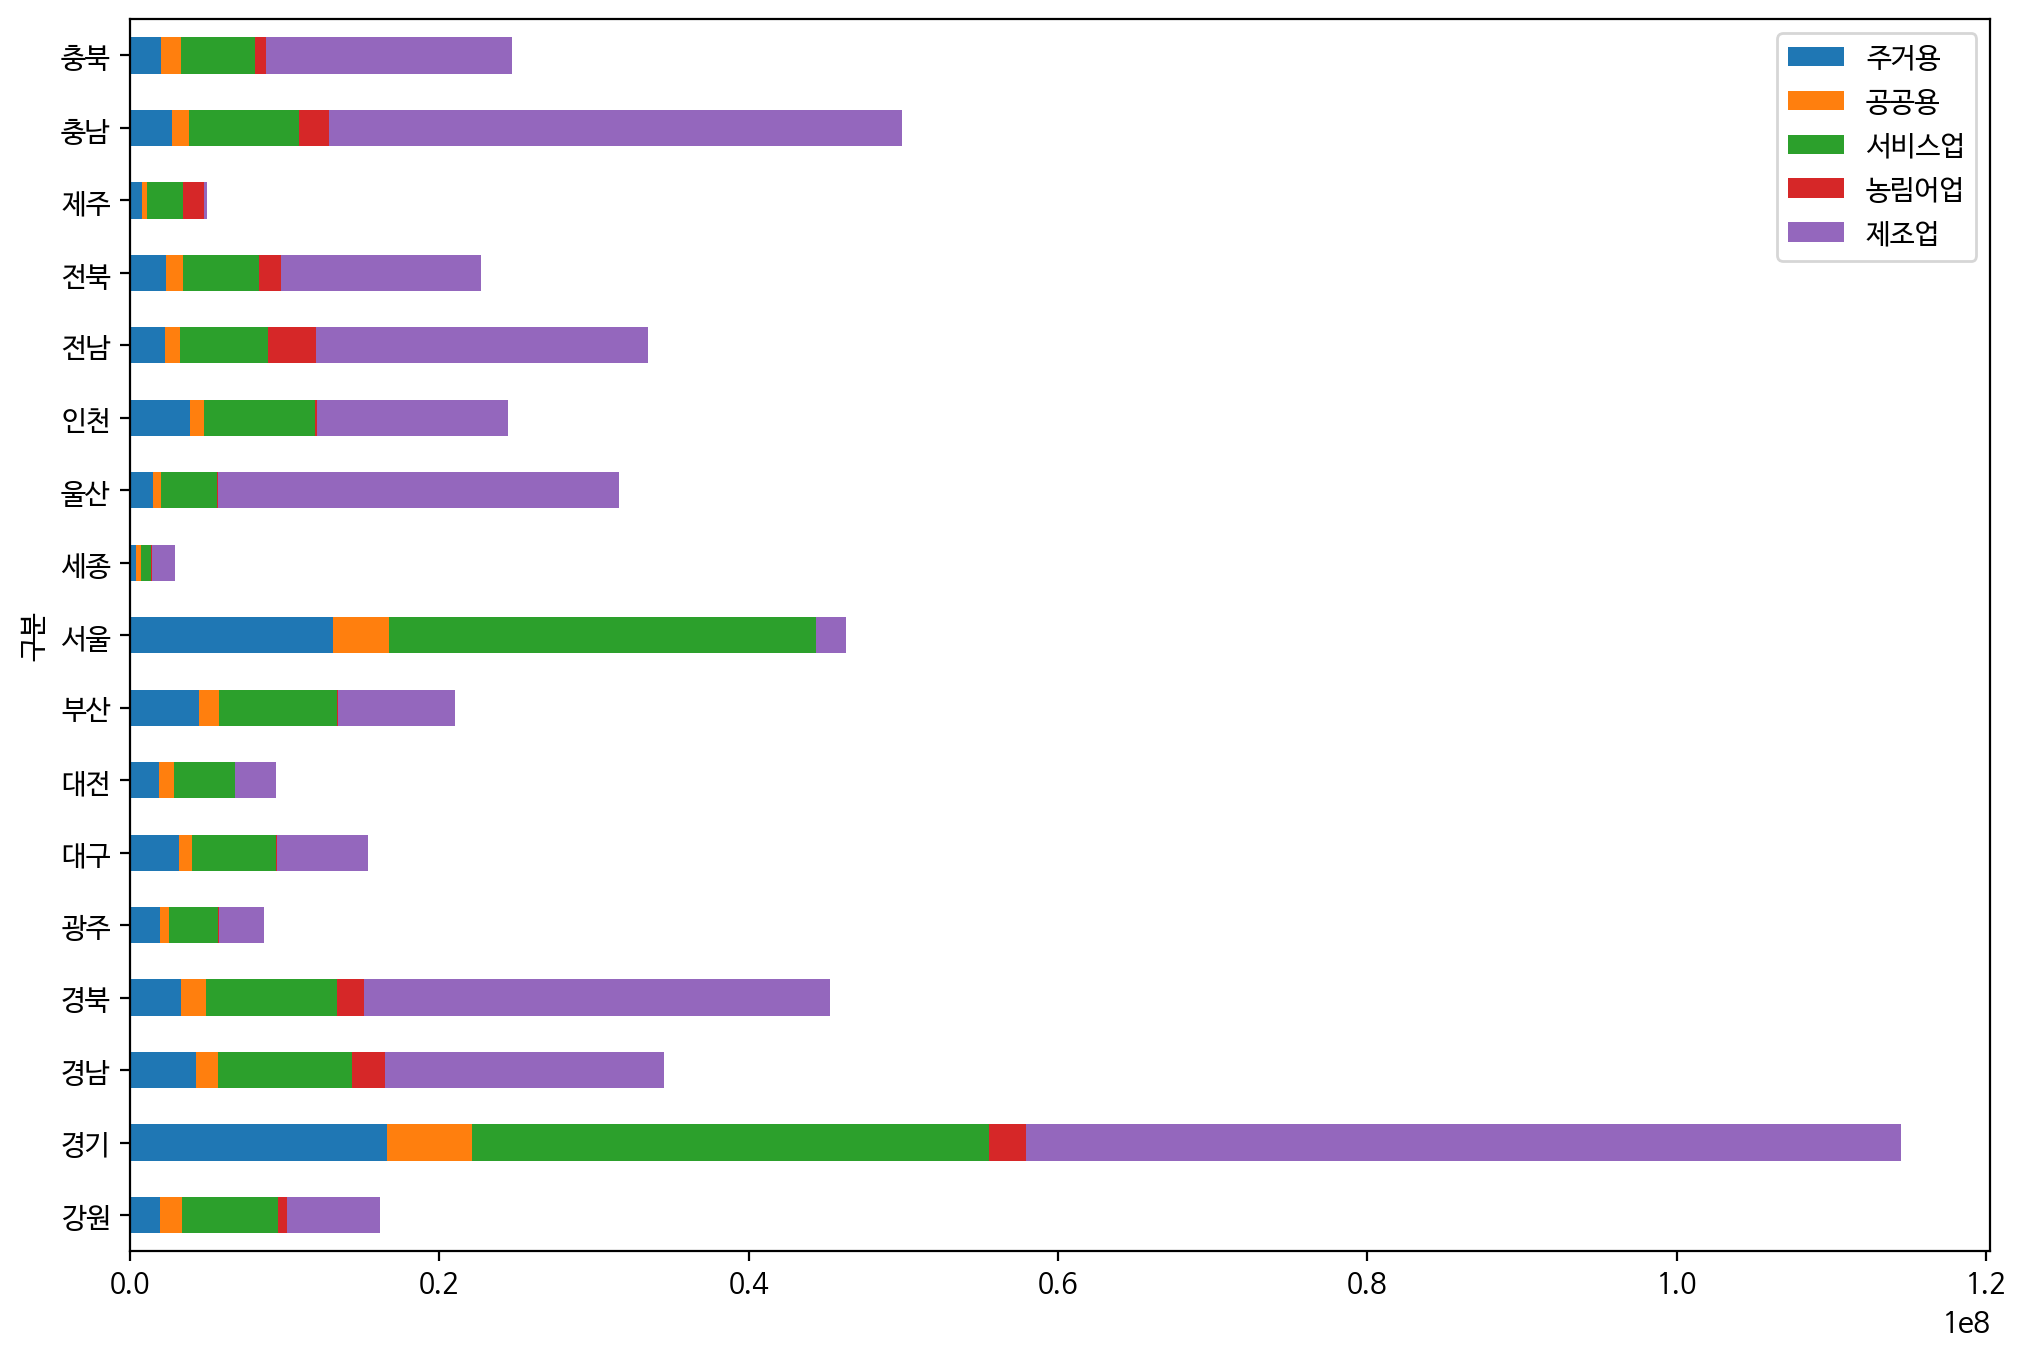

In [ ]:
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

## correlation 보기

<Axes: >

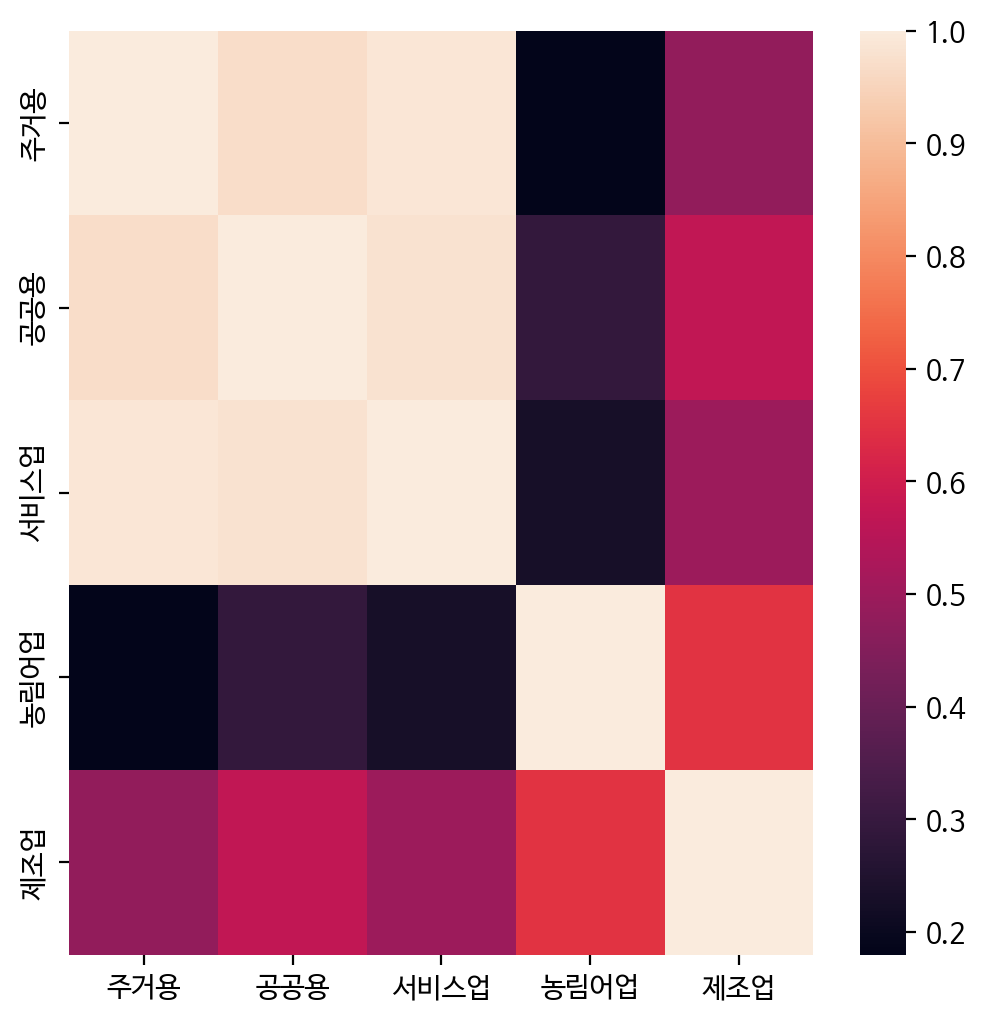

In [ ]:
import seaborn as sns
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power2 = power[sample]
corr = power2.corr().round(2)
plt.figure(figsize=(6,6))
sns.heatmap(corr)

<Axes: >

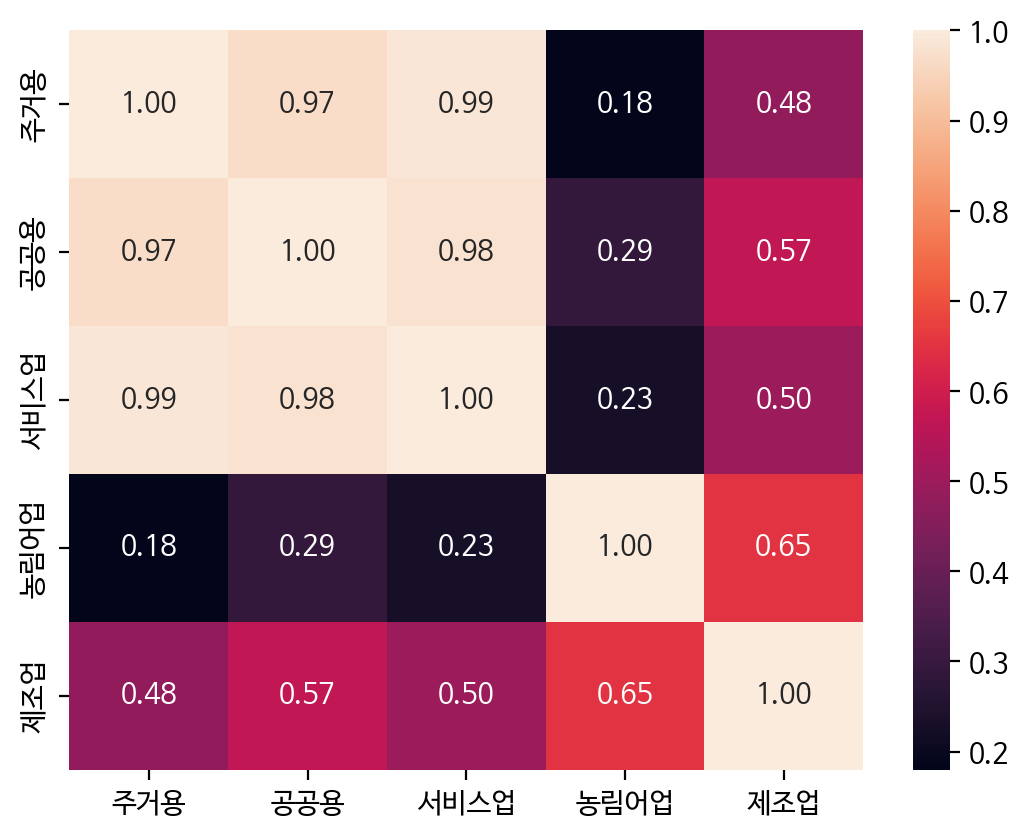

In [ ]:
sns.heatmap(corr.values, cbar=True, annot =True,
            fmt='.2f', annot_kws={'size': 10},
           yticklabels=corr, xticklabels=corr)

## Back to the main ...

<Axes: ylabel='구분'>

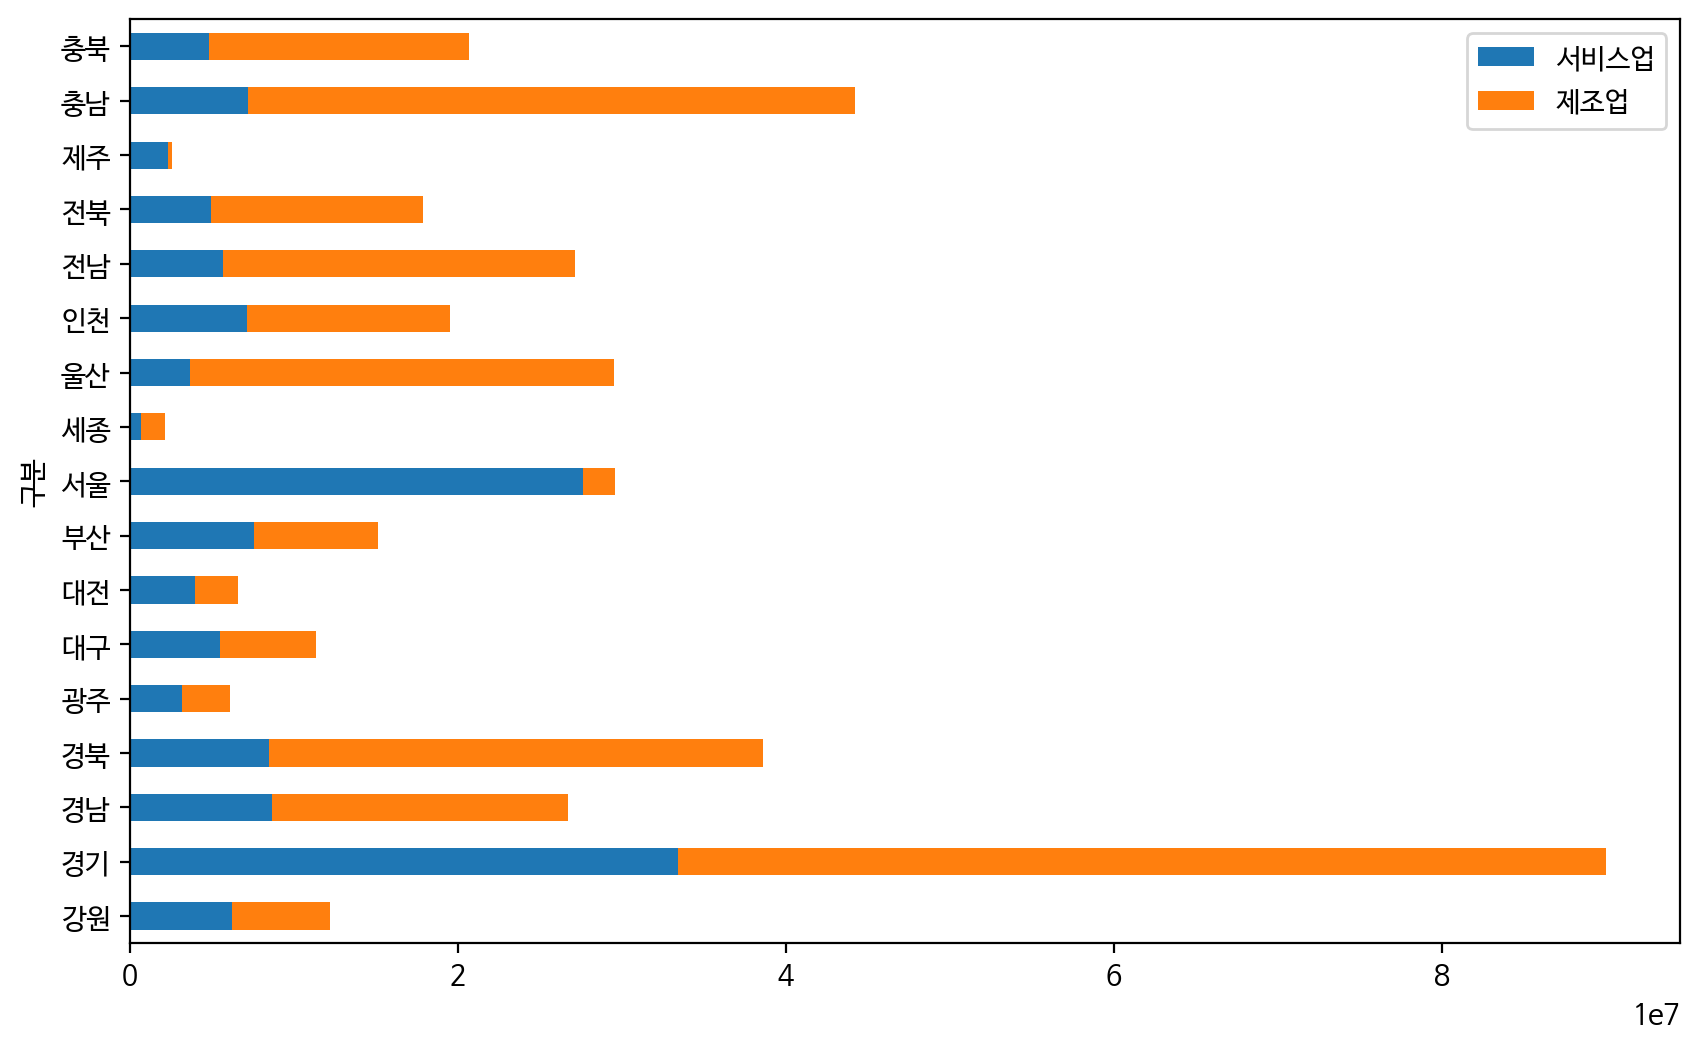

In [ ]:
see2 = [ '서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [ ]:
power = power[['서비스업', '제조업']]
power.T

구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
서비스업,6203749,33434551,8667737,8487402,3174973,5470438,3955921,7582169,27647345,645424,3649386,7154416,5690659,4910318,2308732,7164439,4804638
제조업,6002286,56603327,18053778,30115601,2910768,5862633,2608343,7512588,1918893,1502922,25883132,12367816,21453926,12965875,241537,37057955,15883448


히스토그램
--

<Axes: >

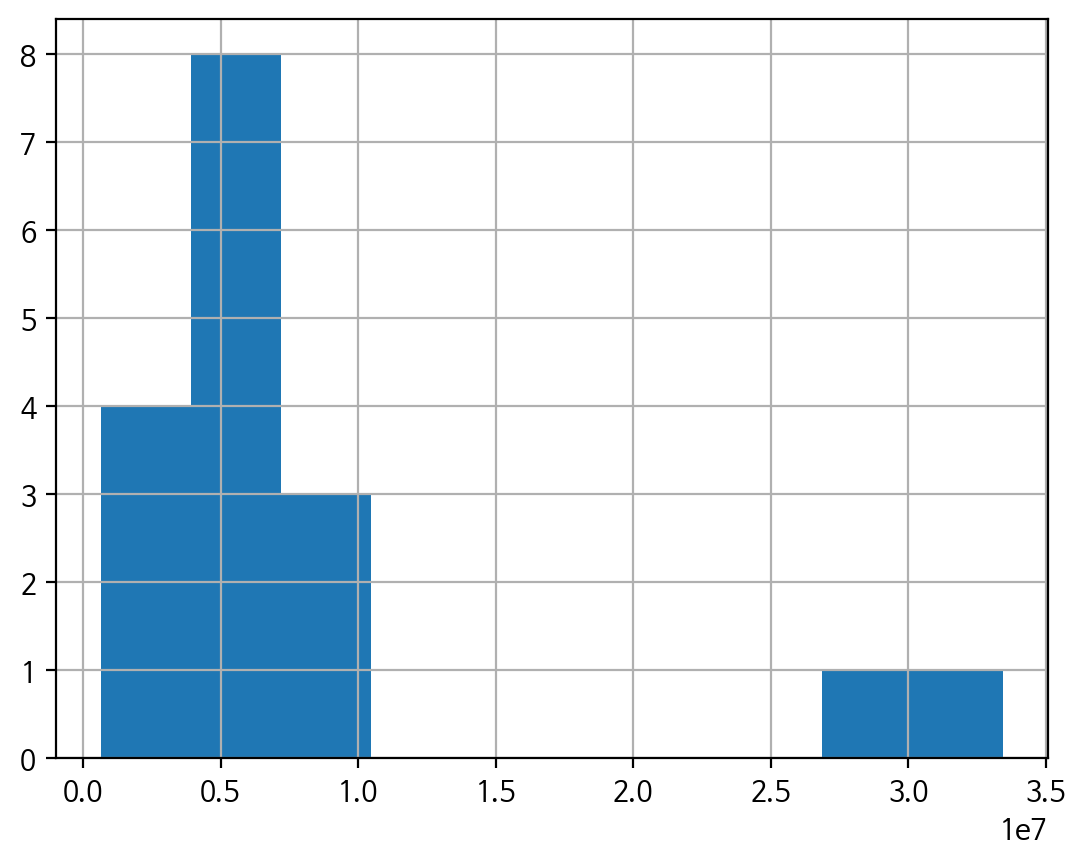

In [ ]:
power['서비스업'].hist()

스캐터 플롯
--

Text(0, 0.5, '제조업')

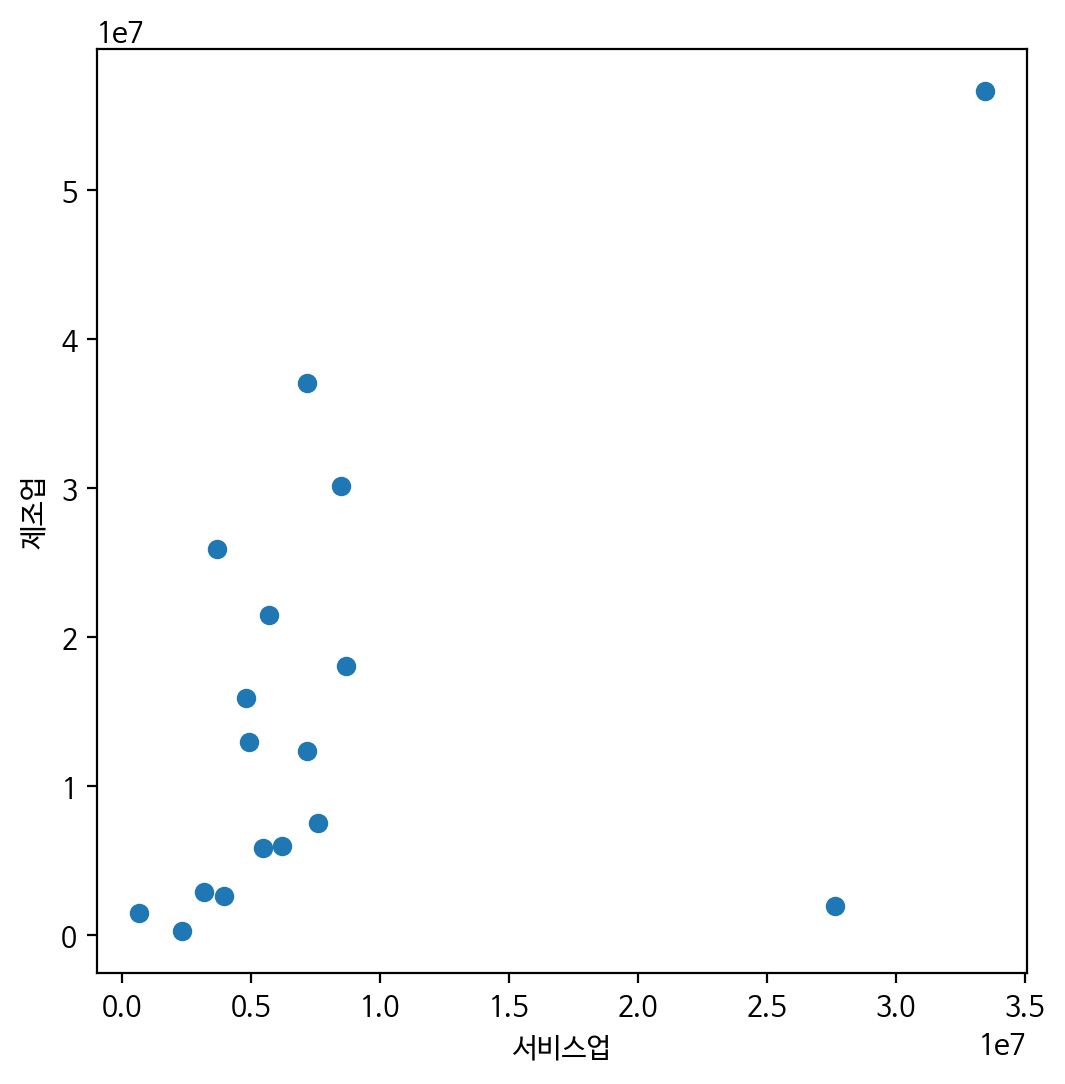

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

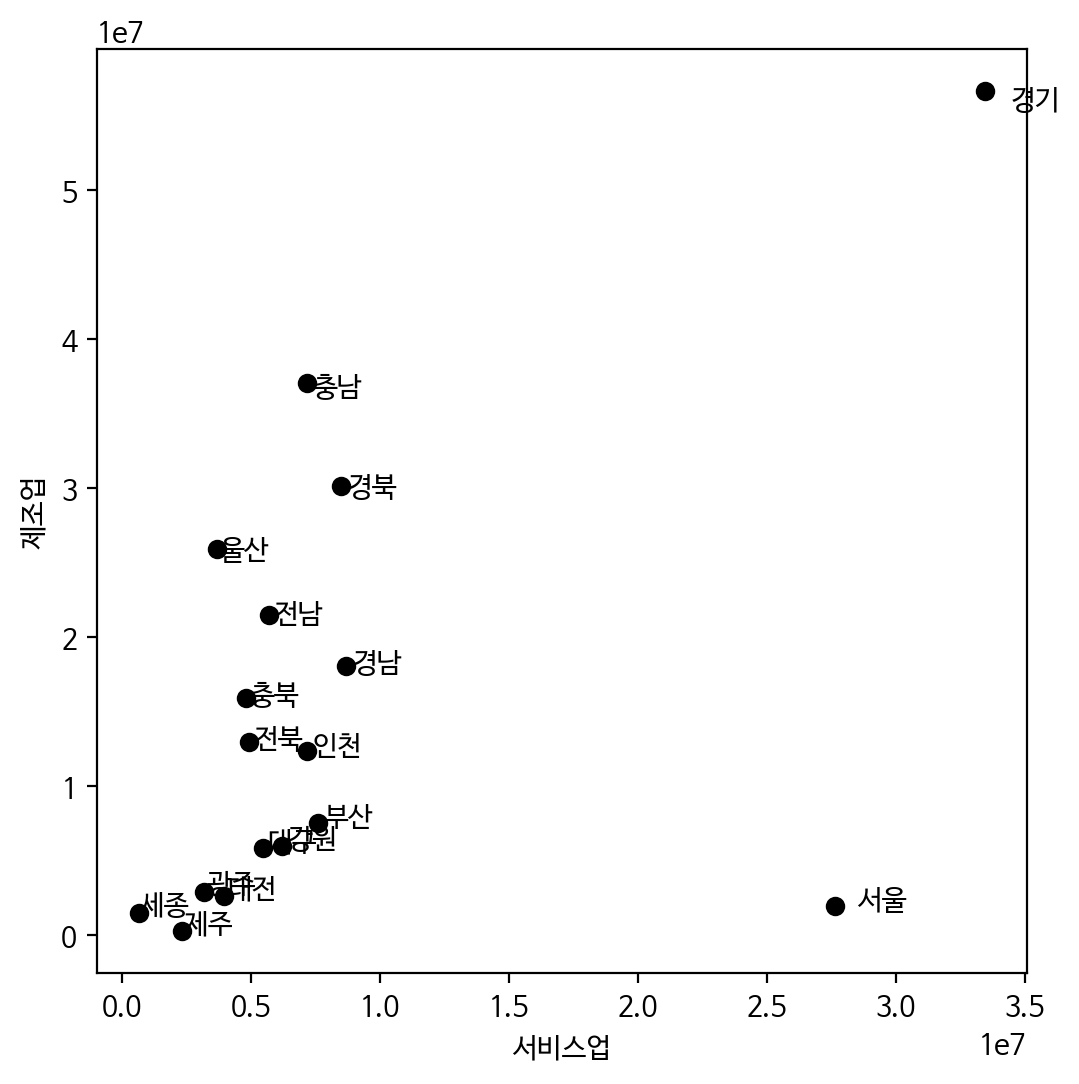

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [ ]:
power = power.drop(['경기', '서울'])
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
세종,645424,1502922
울산,3649386,25883132


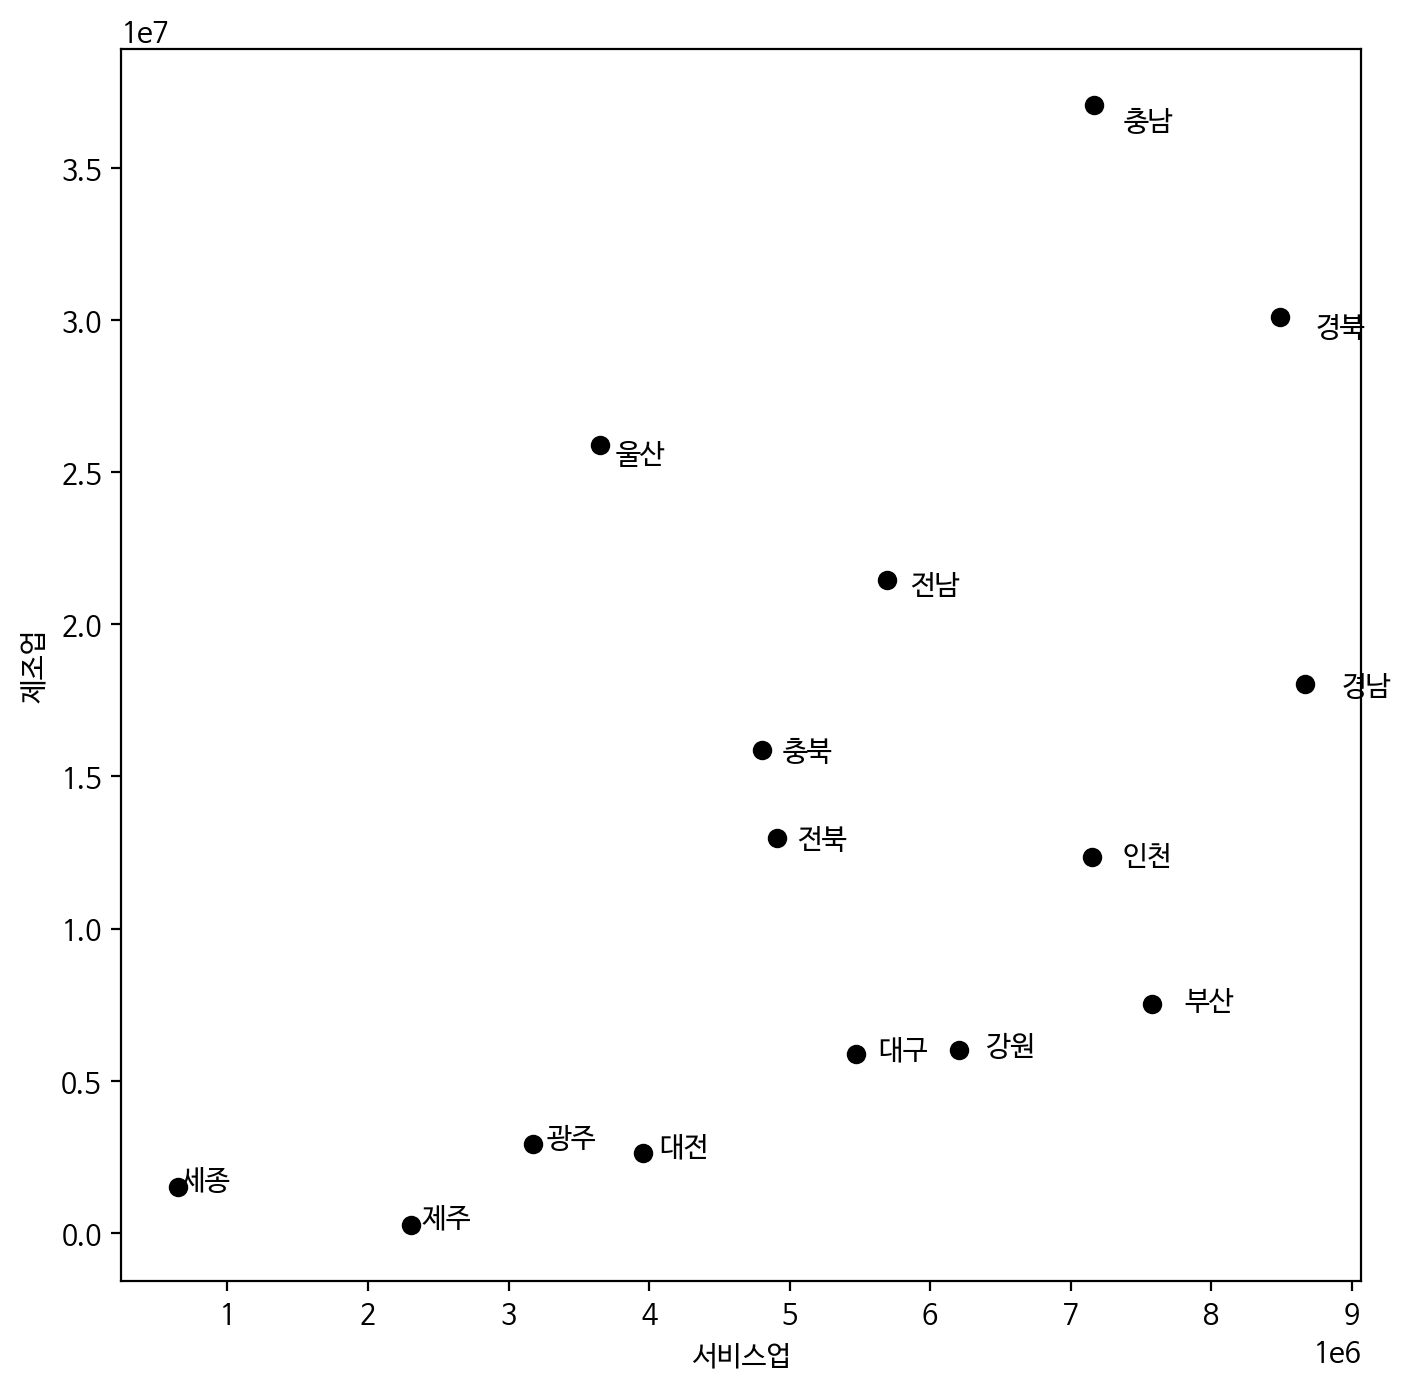

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

# Exercise
- to draw a graph and save it (from excel file)

In [ ]:
data = pd.read_excel("AAA_excel.xlsx", index_col=0)
data.head(5)

In [ ]:
!pip install --upgrade seaborn

In [ ]:
import seaborn as sns

In [ ]:
# plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data, cbar=True, annot =True,
            fmt='.2f', annot_kws={'size': 7},
                 # cmap='Greens')
            )
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)

plt.show()

In [ ]:
# Save the figure
fig.savefig('heatmap.png', dpi=300)  # Saves the figure as a PNG file with 300 dpi
plt.show()